
# Convolutional Neural Networks & Deep Dream

As explained in the [introduction](./velkomstdrink.ipynb), the earliest success stories of deep learning are from the field of *computer vision*. In order to use neural networks in the image domain, we need a new architecture that became known under the name of **convolutional neural networks (CNN)**. In fact, CNNs were already successfully employed by [Yann LeCun, Léon Bottou, Yoshua Bengio, Patrick Haffner](https://ieeexplore.ieee.org/abstract/document/726791/) in 1998. They discuss an specific application of CNNs for reading hand-written cheques. Precursors to CNNs go back already to work by [Kunihiko Fukushima](https://link.springer.com/article/10.1007/BF00344251) in 1980.

<img id="gab" src="images/archs/lenet.jpg"  width="900">

From a mathematical point of view, even single-layer MLP are [universal function approximators](https://link.springer.com/article/10.1007/BF02551274). In other words, in principle  a single-layer MLP with a sufficiently large number of neurons can approximate even highly complicated input-output relations arbitrarily closely. The catch is that these networks become untrainable given today's data and computation power.

One reason for the insufficiency of MLP comes from a computational point of view. Connecting a $512 \times 512$ image  to a single hidden layer consisting of 100 neurons, then this results already in $26,214,400$ parameters. For modern machines, this is not yet the death, but it shows already the challenges that this naïve approach would face.

Besides the computational road blocks, there are also more conceptual reasons calling for a different architecture. Essentially, many insights can already be extracted by looking only at a local neighborhood of a pixel. For instance, for performing edge detection, we might only need to know the value of a dozen of surrounding pixels, whereas an MLP takes into account possible interactions with pixels in the entire image.

In order to deal with these problems, researchers started to look to biology for inspiration.  In particular, the 1962 [Nobel-prize winning work of the neurophysiologists David Hubel and Torsten Wiesel](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1359523/) on the visual cortex in cats provided the decisive clues. 

The first stage of processing of visual information happens in the primary visual context. One of the principal insights of Hubel and Wiesel was that the cells in this part of the brain follow planar pattern mimicking the location of incoming signals on the retina. Moreover, we counter two types of cells: **simple cells** and **complex cells**. 

Simple cells have a small receptive field allowing them to process only information originating from a small spatial area. On the other hand, there are also complex cells capturing translation-invariant information, that is, features which are less dependent on the precise location.

It has been observed that most of cells in the primary visual cortex act as [Gabor filters](https://en.wikipedia.org/wiki/Gabor_filter). That is, they detect edges in a particular direction and orientation.

<img id="gab" src="images/gabor.jpg"  width="490" style="display:inline"></img><img id="gabo" src="images/gabor_ocr.png"  width="450" style="display:inline">

## Convolutions

CNNs mimic the functionality of simple cells in the visual cortex. Instead of multiplying the input with a humongous matrix involving information coming from the entire image, CNNs use a certain number of matrices -- called *channels* or *filters* -- that make use only of local information and are then slided over the entire window.

Instead of writing down this in a [mathematically precise form](https://en.wikipedia.org/wiki/Convolution), this is explained best by a [beautiful animation](./images/convDemo/index.html) from [Andrej Karpathy's course on CNNs](http://cs231n.github.io/convolutional-networks/).

We go through the main concepts behind convolution in a separate [Notebook](./convolutions.ipynb).

## Max Pooling

As explained above, the convolutional layers can be seen as an analog of the simple cells in the primary visual cortex. However, the simple cells alone do not suffice for perception as many vision-oriented tasks additionally rely on the recognition of translation-invariant features.

Here, the concept of **Max Pooling** enters the stage. Max pooling performs a downsampling of the original image by partitioning it into smaller subregions and only choosing the maximum activation from each subregion. Loosely speaking,  to recognize a cat in an image, it should not matter so much whether the eyes of the cat are shifted a little bit to the left or a little bit to the right, as long as they are roughly in the correct position.

<img id="maxp" src="images/maxpool.jpeg"  width="500">
[cs231n.github.io](https://cs231n.github.io)


## Combining Convolutions and Pooling

A standard CNN is now nothing else than a composition of roughly a dozen convolutional and max-pooling layers. After the final pooling layer, we add one or more dense layers mapping the spatial image data to one of the classes the CNN is designed to distinguish.

<img id="cnn" src="images/karp_cnn.jpeg"  width="1500" height="750" style="vertical-align:-200px;">
       [cs231n.github.io](https://cs231n.github.io)



As a rule of thumb, the number of layers needed in a CNN corresponds to the complexity of the computer vision task. For instance, the first convolutional layer typically detects very elementary image characteristics, such as the presence of edges or color gradients.

The following layers capture increasingly complex concepts. For instance, several edges aligned in a good order can form circle. Going further, building on the concept of edges and circles empowers us to detect eyes and then faces in the subsequent layers.

### Classification on MNIST

The *Hello World* of image recognition is the MNIST data set consisting of 60,000 hand-written digits represented as 28x28 binary images. This is a nice test-bed for new architectures: even before the advent of deep learning it was possible to achieve more than 99% prediction accuracy.

Since the problem of recognizing MNIST digits is relatively simple, a CNN with a small number of layers already achieves good accuracy. Adam Harley provides a beautiful illustration of the CNN concept:
[http://scs.ryerson.ca/~aharley/vis/conv/flat.html](images/conv/flat.html)
         http://scs.ryerson.ca/~aharley/vis/conv/flat.html.

### Classification on ImageNet

[ImageNet](http://image-net.org/about-stats) is a substantially more challenging dataset consisting of more than 14 million training images, each assigned to one of 1,000 classes. ImageNet classification is one of the major driving forces behind the success of deep learning, since here CNNs were able to beat previous approaches by a large margin.

Indeed, in 2012 a deep learning architecture under the name of [AlexNet](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks) by Alex Krizhevsky, Ilya Sutskever and Geoffrey Hinton reduced the top-5 error rate from previously 25.8% to 16.4%. In 2014 an [VGG 16](https://arxiv.org/abs/1409.1556) by Karen Simonyan and Andrew Zisserman reduced the error to 7.3%. Although, today is not state-of-the-art for the ImageNet challenge any longer, it is still used for the purpose of transfer learning.

The architecture of VGG 16 decomposes into 5 blocks of convolutional layers.

<img id="cnn" src="images/vgg16.png"  width="700px">
https://blog.heuritech.com/2016/03/02/yann-lecun-lectures-at-the-college-de-france-n3/


We can also inspect the Keras representation of VGG16. It tells us that VGG16 has a whopping 140 million parameters!

In [1]:
import keras
from keras.applications import VGG16

model = VGG16(weights='imagenet')
model.summary()

Using TensorFlow backend.


553467904/553467096 [==============================] - 22s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_p

## Fine-Tuning

As deep learning challenges domain-specific elaborate handcrafted solutions, it is often met with skepticism and domain experts try to protect their fiefdoms by putting off deep-learning methods as a fad.

One commonly held belief is that due to the gigantic number of parameters, deep nets are only effective for very particular problems like imagenet featuring a large amount of training data.

Although it is true that training a modern deep network from scratch requires a substantial amount of training data, it is often possible to reuse nets trained on related tasks. This is known as **transfer learning**.

We explain this following the excellent ``keras``-tutorial by Francois Chollet https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html. The task is to train a classifier in order to distinguish images of cats from images of dogs. Since the 1000 categories of imagenet also contain several different breeds of dogs and cats, a network trained on imagenet should be useful for the present task as well.

### VGG as Feature Extractor

The simplest approach to transfer learning is to take a battle-hardened architecture such as VGG16 and use it as a *feature extractor*. More precisely, we remove the dense layers and consider the output of the remaining network as features describing relevant characteristics of the image.

As initial step, we define the truncated network.

In [5]:
from keras.models import Model, Sequential

vgg16 = VGG16(include_top=False, weights='imagenet')
vgg = Model(vgg16.input, 
            vgg16.layers[-1].output)

Next, we create a data generator, so that we can retrieve the images from memory and send them through the network. To accelerate training, we only consider training and validation sets consisting of 1000 cats and 1000 dogs each.

In [4]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 10
n_sample = 2000 / batch_size

target_size = (150, 150, 3)
seed = 42
tr_val = ['train', 'validation']

datagen = ImageDataGenerator(rescale=1. / 255) 
gen_train, gen_val = [
    datagen.flow_from_directory(
        'data/{}_small'.format(tv),
        target_size=target_size[:2],
        batch_size=batch_size,
        class_mode=None,  
        shuffle=True,
        seed=seed)
    for tv in tr_val
]

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Since we decided to shuffle the data before sending it through the network, we need to mimic the shuffling when extracting the labels.

In [191]:
import numpy as np

np.random.seed(seed)
labels_train = np.array([w[:1] for w in np.random.permutation(gen_train.filenames)]) == 'd'

np.random.seed(seed)
labels_val = np.array([w[:1] for w in np.random.permutation(gen_val.filenames)]) == 'd'

Now, we extract the features and save them to disk.

In [192]:
%%time
features_tv = [vgg.predict_generator(generator, n_sample) for generator in [gen_train, gen_val]]

[np.save(open('feat_weights/bottleneck_features_{}.npy'.format(tv), 'wb'), features)
  for tv,features in zip(tr_val, features_tv)
]

CPU times: user 42 s, sys: 4.24 s, total: 46.2 s
Wall time: 1min 18s


The features can be restored at any later point in time as follows.

In [193]:
features_tv = [np.load(open('data/bottleneck_features_{}.npy'.format(tv), 'rb'))
  for tv,features in zip(tr_val, features_tv)
]

The idea behind transfer learning is that the extracted features are so powerful, that a single layer MLP based on these features suffices to tell cats from dogs.

In [196]:
from keras.layers import Dense, Dropout, Flatten

model = Sequential([
    Flatten(input_shape=data[0].shape[1:]),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Since we only need to train a single-layer MLP the training of the top network is lightning fast.

In [197]:
model.fit(features_tv[0], labels_train,
          epochs=10,
          batch_size=batch_size,
          validation_data=(features_tv[1], labels_val))

Train on 2000 samples, validate on 2000 samples
Epoch 1/10
2000/2000 [==============================] - 3s 1ms/step - loss: 0.6694 - acc: 0.7535 - val_loss: 0.6154 - val_acc: 0.7160
Epoch 2/10
2000/2000 [==============================] - 2s 830us/step - loss: 0.4181 - acc: 0.8240 - val_loss: 0.3846 - val_acc: 0.8505
Epoch 3/10
2000/2000 [==============================] - 2s 843us/step - loss: 0.3352 - acc: 0.8645 - val_loss: 0.4025 - val_acc: 0.8310
Epoch 4/10
2000/2000 [==============================] - 2s 854us/step - loss: 0.2990 - acc: 0.8825 - val_loss: 0.2878 - val_acc: 0.8910
Epoch 5/10
2000/2000 [==============================] - 2s 876us/step - loss: 0.2528 - acc: 0.8980 - val_loss: 0.3304 - val_acc: 0.8890
Epoch 6/10
2000/2000 [==============================] - 2s 864us/step - loss: 0.2514 - acc: 0.9110 - val_loss: 0.3241 - val_acc: 0.8900
Epoch 7/10
2000/2000 [==============================] - 2s 876us/step - loss: 0.2239 - acc: 0.9125 - val_loss: 0.3298 - val_acc: 0.8920
Ep

We store the model weights on disk, so that we can reuse them later.

In [198]:
model.save_weights('feat_weights/bottleneck_fc_model.h5')

### Retraining of Final Layers

Although fitting an MLP on VGG16 features already provides good results, the idea of transfer learning can be refined further. Indeed, one downside of the feature-extraction approach is that data augmentation becomes cumbersome. Moreover, although we do not have an incentive to change the early layers of VGG, it might make sense to allow the later convolution layers be problem-dependent. The reason for this is that the early layers perform basic geometric tasks such as recognizing edges, whereas higher layers can capture more abstract concepts.

First, for the training we now use a generator that performs data augmentation.

In [231]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=.2,
        zoom_range=.2,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)

gen_tv = [
    datagen.flow_from_directory(
        'data/{}_small'.format(tv),
        target_size=target_size[:2],
        class_mode='binary',
        batch_size=batch_size,
        shuffle=True,
        seed=seed)
    for tv, datagen in zip(['train', 'validation'], [train_datagen, valid_datagen])
]

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Now, we consider VGG 16 with a customized top and only allow the highermost layers to be influenced by the model fitting. 

In [232]:
model = VGG16(weights='imagenet', include_top=False, input_shape=target_size)
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential([
    Flatten(input_shape=features_tv[0].shape[1:]),
    Dense(256, activation='relu'),
    Dropout(.5),
    Dense(1, activation='sigmoid'),
])

top_model.load_weights('feat_weights/bottleneck_fc_model.h5' )
model = Model(inputs= model.input, outputs= top_model(model.output))

Model loaded.


We now disable training of the early layers. 

In [233]:
from keras.optimizers import SGD

for layer in model.layers[:25]:
    layer.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

Now, we train the enhanced model.

In [234]:
model.fit_generator(
        gen_tv[0],
        steps_per_epoch=n_sample,
        epochs=10,
        validation_data=gen_tv[1],
        validation_steps=n_sample)

Epoch 1/10
200/200 [==============================] - 95s 475ms/step - loss: 0.3017 - acc: 0.9010 - val_loss: 0.4221 - val_acc: 0.8910
Epoch 2/10
200/200 [==============================] - 55s 275ms/step - loss: 0.2742 - acc: 0.9145 - val_loss: 0.4221 - val_acc: 0.8910
Epoch 3/10
200/200 [==============================] - 58s 289ms/step - loss: 0.3445 - acc: 0.9020 - val_loss: 0.4221 - val_acc: 0.8910
Epoch 4/10
200/200 [==============================] - 57s 286ms/step - loss: 0.3462 - acc: 0.9000 - val_loss: 0.4221 - val_acc: 0.8910
Epoch 5/10
200/200 [==============================] - 59s 296ms/step - loss: 0.3088 - acc: 0.9025 - val_loss: 0.4221 - val_acc: 0.8910
Epoch 6/10
200/200 [==============================] - 58s 291ms/step - loss: 0.2723 - acc: 0.9130 - val_loss: 0.4221 - val_acc: 0.8910
Epoch 7/10
200/200 [==============================] - 55s 276ms/step - loss: 0.3160 - acc: 0.9065 - val_loss: 0.4221 - val_acc: 0.8910
Epoch 8/10
200/200 [==============================] - 6

Unfortunately, in this example allowing more layers to be retrained did not result in an improvement of the validation error. However, there are several further steps we could try to improve the performance:
1. Train on more data
2. Try further data augmentation
3. Improve on regularization, e.g. by inserting batch normalization

## Architectures

Although CNNs have already appeared in the 1980s, the way in which different layers are composed to solve computer vision tasks has changed dramatically over the years. Following a highly informative [blog post](https://www.jeremyjordan.me/convnet-architectures/) by Jeremy Jordan, we briefly review the history from the dawn of time to the modern era.

### LeNet


**LeNet** can be seen as the fundamental basis for CNNs and was proposed by [Yann LeCun, Léon Bottou, Yoshua Bengio, Patrick Haffner](https://ieeexplore.ieee.org/abstract/document/726791/) in 1998. Although it contains only 2 convolutional layers, this network achieves impressive performance for reading handwritten cheques.

<img id="gab" src="images/archs/lenet.jpg"  width="900">

### AlexNet

In 2012, Alex Krizhevsky, Geoffrey Hinton, and Ilya Sutskever caused the *big bang* for deep learning by winning the ILSCVR 2012 competition by a large margin with their network **AlexNet**.

<img id="gab" src="images/archs/ilsvrc.png"  width="700">
https://medium.com/@sidereal/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5

Winning the ILSCVR 2012 competition on classifying $224 \times 224$ images required a far more elaborate architecture than the one used for LeNet. In particular, AlexNet contains 4 convolutional layers. 



<img id="gab" src="images/archs/aleyNet.png"  width="900">
https://www.jeremyjordan.me/convnet-architectures/

### VGG 16

In 2014, the network **VGG 16** developed by [Karen Simonyan & Andrew Zisserman](https://arxiv.org/abs/1409.1556) reduced the Top 5-error to 7.3%. In comparison to AlexNet VGG 16 goes far deeper, now moving from 4 to 13 convolutional layers. 

<img id="cnn" src="images/vgg16.png"  width="700px">
https://blog.heuritech.com/2016/03/02/yann-lecun-lectures-at-the-college-de-france-n3/


Today, VGG 16 is still used as feature extractor and for the purpose of transfer learning.

### Inception

In 2015, **GoogleNet** developed by [Christian Szegedy, Wei Liu, Yangqing Jia, Pierre Sermanet, Scott Reed, Dragomir Anguelov, Dumitru Erhan, Vincent Vanhoucke & Andrew Rabinovich](https://arxiv.org/abs/1409.4842) further reduced the error on ImageNet to 6.7%.  It features a total of 22 layers.

<img id="gab" src="images/archs/GoogleNet.png"  width="900">
https://www.jeremyjordan.me/convnet-architectures/

Additionally, the [paper](https://arxiv.org/abs/1409.4842) introduces the **inception module** as a crucial new architecture component. Instead of fixing the kernel size $3 \times 3$, the idea is to consider also $5 \times 5$ and $7 \times 7$ filters, and then let the network learn what filter sizes work best. The issue is that if implemented naïvely, this idea leads to a quick computational death.

The inception module solves this problem by relying on $1 \times 1$ convolutions to reduce the channel numbers. On the reduced channel space, convolutions with varying kernel sizes can be carried out efficiently.

<img id="gab" src="images/archs/inception.jpg"  width="900">

We can understand this by a quick back-of-the envelope calculation. Suppose, we use $5 \times 5$ kernels to go from $192$ channels to $32$ channels. This involves 
$$5^2 \cdot 192 \cdot 32 = 153,600$$ 
parameters. On the other hand, suppose we first apply $1 \times 1$ convolutions to go from $192$ to $16$ channels and then $5 \times 5$ convolutions to go from $16$ to $32$ channels. Then, the total number of parameters reduces to
$$ 192 \cdot 16 + 5^2 \cdot 16 \cdot 32= 15,872.$$

### ResNet

**ResNet** was developed by [Kaiming He, Xiangyu Zhang, Shaoqing Ren & Jian Sun](https://arxiv.org/abs/1512.03385) and won the ILSCVR 2015 competition with an error of 3.57%. By now, we have understood that the number of layers is the name of the game in image recognition and ResNet epitomizes this law by relying on 152 layers.

Scaling the number of components into this regime is only possible due to a new architectural component called **skip connections**. The idea behind skip connections is to change the parametrization so as to encode the difference of a function with the identity instead of the function itself. 

<img id="gab" src="images/archs/resnet1.jpg"  width="500">

### DenseNet

We turn now to the final CNN model: **DenseNet**, developed in 2016 by [Gao Huang, Zhuang Liu, Laurens van der Maaten & Kilian Q. Weinberger](https://arxiv.org/abs/1608.06993). The idea behind DenseNet is that often feature maps from early layers can also provide valuable information for later layers. Therefore, the output of earlier layers is copied to the input of later layers.

<img id="gab" src="images/archs/denseNet1.png"  width="700">
https://www.jeremyjordan.me/convnet-architectures/

Clearly, this concatenation of feature maps leads to a rapid growth in the number of parameters. In **DenseNet**, this growth is controlled by using only of the order of 12 channels. 

<img id="gab" src="images/archs/denseNet2.png"  width="900">
https://www.jeremyjordan.me/convnet-architectures/

In [6]:
from keras.applications.densenet import DenseNet121

In [14]:
mod = DenseNet121(weights=None)

## Deep Dream

Despite the unprecedented performance that deep learning has brought for classification problems across fields, there remains a big mystery on how and why neural networks come to their conclusions. In short, in contrast to classical methods such as logistic regression they lack **interpretability**.

On that background [engineers at Google AI](https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html) devised a spectacular visualization method called **Deep Dream** to illustrate on how neural networks see the world. The psychadelic nature of these dreams is as fascinating as it is frightening.

<img id="cnn" src="images/deepDream.jpg"  width="700px">
https://futurism.com/artificial-intelligence-already-better-artist-you/

The technique works as follows. We start with our favorite image serving as a canvas for the dream. We perform a preprocessing step, so that it can be fed readily into the inception network.

In [14]:
from keras.preprocessing import image 
 
img = image.load_img('images/sky.jpg')
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = inception_v3.preprocess_input(img)

<img id="gab" src="images/sky.jpg"  width="900">
https://github.com/google/deepdream

Then, we modify this images in a way to maximize the average squared activations in a selected layer. Loosely speaking, this provides us with an intuition on what a deep CNN would like to see in an image. Here is an illustration of the original results from Google.

<img id="gab" src="images/skybright.jpg"  width="900">
https://github.com/google/deepdream

To explore the mechanisms of deep learning ourselves, we follow [Chapter 8.2 of *Deep Learning with Python*](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/8.2-deep-dream.ipynb). *Deep Dream* sparked a variety of research projects on interpretability discussed in a recent [Distill article](https://distill.pub/2018/building-blocks/) by Chris Olah et al.

We analyze the InceptionV3 architecture, which is a variant of the original [GoogleNet](https://github.com/google/inception). In contrast to what we have considered so far, our goal is not to train a model so as to optimize the performance for a specific task. We rather take a model that is already trained and ask about conceptual information that can be extracted from the weights after training.

Hence, we entirely disable the usual learning phase.

In [6]:
from keras.applications import inception_v3
from keras import backend as K

K.set_learning_phase(0)
model = inception_v3.InceptionV3(weights='imagenet',
                                 include_top=False)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

Instead of focussing on a single layer, we experiment by optimizing linear combinations of multiple layers.

In [7]:
layer_contributions = {
    'mixed2': .01,
    'mixed3': .01,
    'mixed4': 4.01,
    'mixed5': 4.01,
}

When fitting CNNs for regression and classification tasks, we could rely on standard loss functions such as **mse** or **cross-entropy loss** that are readily available in ``keras``. In contrast, maximizing the average of squared activations is a highly unusual loss function, so that we have to implement it ourselves. To avoid boundary effects, we only take into account locations that are not near the boundary.

In [9]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

# Define the loss.
loss = K.variable(0.)
for layer_name in layer_contributions:
    coeff = layer_contributions[layer_name]
    activation = layer_dict[layer_name].output

    scaling = K.prod(K.cast(K.shape(activation), 'float32'))
    loss = loss + coeff * K.sum(K.square(activation[:, 2: -2, 2: -2, :])) / scaling

Now, the idea is to gradually modify initial image such that the loss function is optimized. Since we  proceed by gradient ascent, it is first crucial to have access to the gradients of the loss and the loss itself. We also normalize them, so as to avoid gradient explosion.

In [10]:
dream = model.input
grads = K.gradients(loss, dream)[0]
grads /= K.maximum(K.mean(K.abs(grads)), 1e-7)
outputs = [loss, grads]
fetch_loss_and_grads = K.function([dream], outputs)

Now, we define the gradient-ascent.

In [12]:
def eval_loss_and_grads(x):
    loss_value, grad_values = fetch_loss_and_grads([x])
    return loss_value, grad_values

def gradient_ascent(x, iterations=20, step=.01, max_loss=10):
    for i in range(iterations):
        loss_value, grad_values = eval_loss_and_grads(x)
        if max_loss is not None and loss_value > max_loss:
            break
        print('...Loss value at', i, ':', loss_value)
        x += step * grad_values
    return x

It turns out, performing gradient descent on the entire image at once is numerically unstable. Hence, we first consider coarsened images before moving to the fine scales. We order the shapes from coarse to fine.

In [15]:
num_octave = 3  # number of scales
octave_scale = 1.4  # ratio between scales

original_shape = img.shape[1:-1]
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)
successive_shapes = successive_shapes[::-1]

Before applying gradient ascent at several scales, we introduce an auxiliary image-resize function.

In [16]:
import scipy

def resize_img(img, size):
    img = np.copy(img)
    factors = (1,
               float(size[0]) / img.shape[1],
               float(size[1]) / img.shape[2],
               1)
    return scipy.ndimage.zoom(img, factors, order=1)

 To complement the multiscale gradient ascent, we rely on a control-variate approach  to add details to the coarse instances.

In [18]:
import numpy as np

# Resize the image to the smallest scale
original_img = np.copy(img)
shrunk_original_img = resize_img(img, successive_shapes[0])

for shape in successive_shapes:
    print('Processing image shape', shape)
    img = resize_img(img, shape)
    img = gradient_ascent(img)
    upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
    same_size_original = resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img

    img += lost_detail
    shrunk_original_img = resize_img(original_img, shape)

Processing image shape (461, 822)
...Loss value at 0 : 0.9069773
...Loss value at 1 : 1.2789652
...Loss value at 2 : 1.8442786
...Loss value at 3 : 2.4456716
...Loss value at 4 : 3.0076787
...Loss value at 5 : 3.5751572
...Loss value at 6 : 4.151562
...Loss value at 7 : 4.622131
...Loss value at 8 : 5.1866693
...Loss value at 9 : 5.6258802
...Loss value at 10 : 6.120726
...Loss value at 11 : 6.55768
...Loss value at 12 : 7.102515
...Loss value at 13 : 7.4734554
...Loss value at 14 : 7.9401255
...Loss value at 15 : 8.258231
...Loss value at 16 : 8.718114
...Loss value at 17 : 9.21949
...Loss value at 18 : 9.572464
Processing image shape (646, 1152)
...Loss value at 0 : 2.3404956
...Loss value at 1 : 3.7480705
...Loss value at 2 : 4.6119394
...Loss value at 3 : 5.3968186
...Loss value at 4 : 6.012779
...Loss value at 5 : 6.7260523
...Loss value at 6 : 7.2303987
...Loss value at 7 : 7.909601
...Loss value at 8 : 8.340855
...Loss value at 9 : 8.935394
...Loss value at 10 : 9.459731
...Loss

Finally, undoing the preprocessing steps results in the deep-dream picture

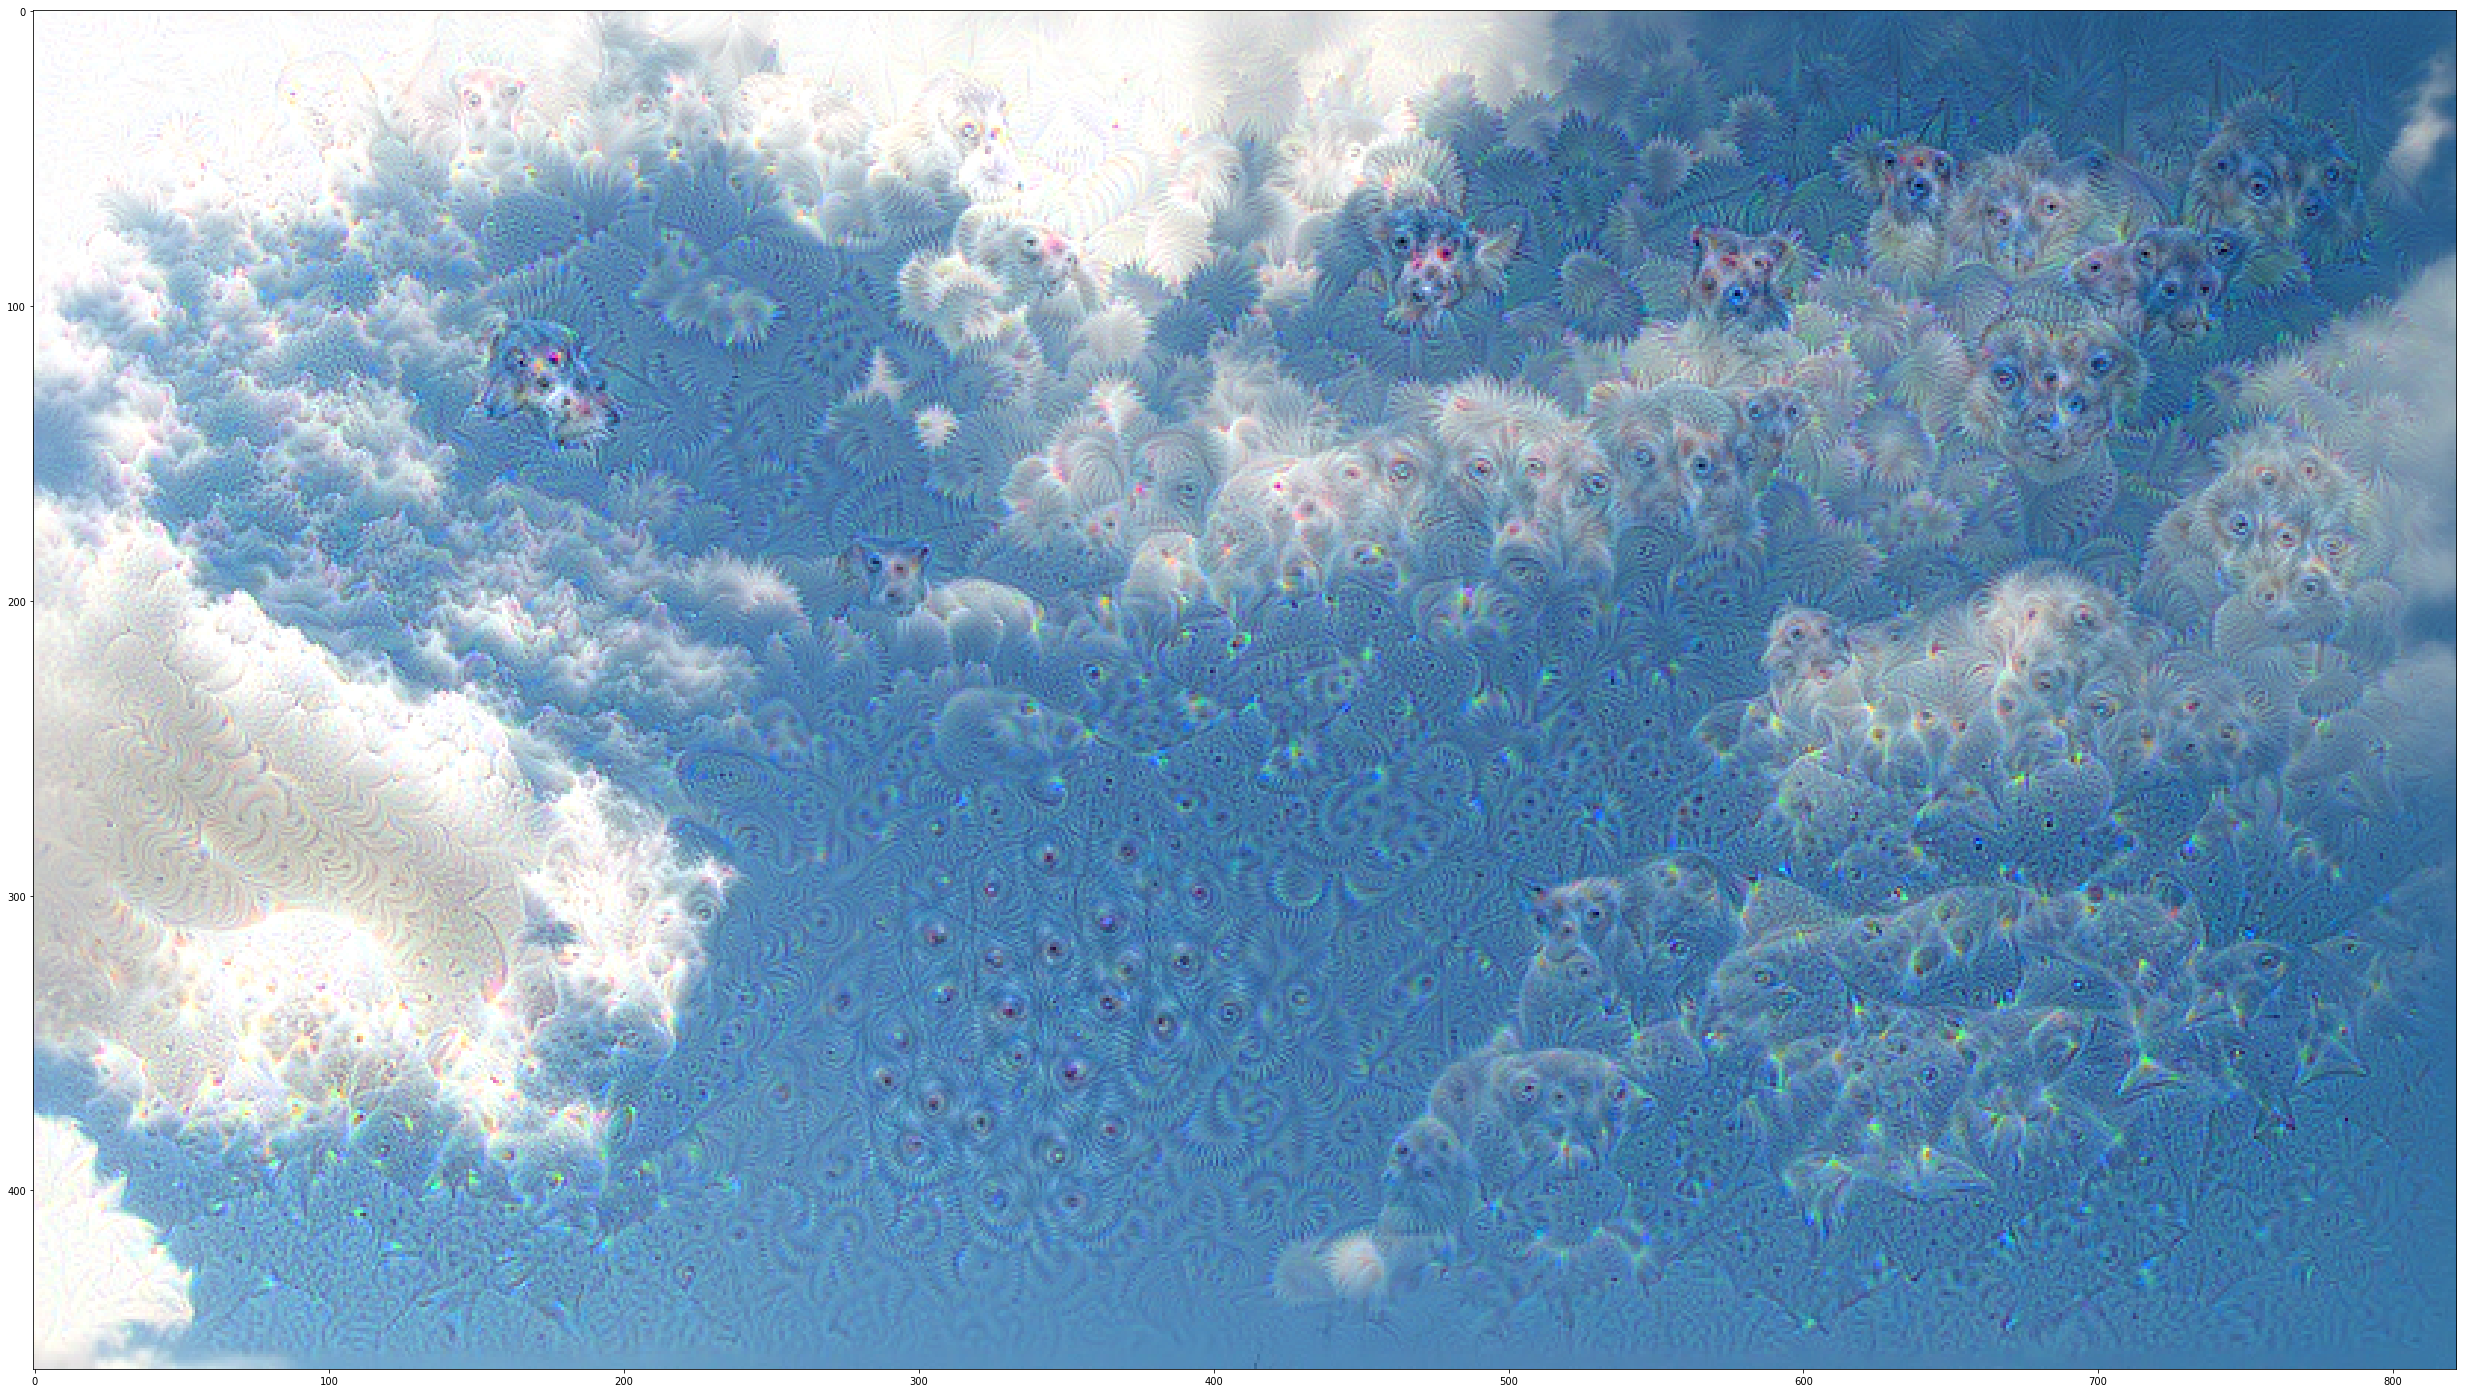

In [292]:
from matplotlib import pyplot as plt
%matplotlib inline

result = np.copy(img)
result = result.reshape((result.shape[1], result.shape[2], 3))
result = (result/2 + .5) * 255
result = np.clip(result, 0, 255).astype('uint8')

figsize = (45,25)
fig = plt.figure(figsize = figsize) 
ax = fig.add_subplot(111)
ax.imshow(result, interpolation='none')
plt.show()